In [17]:
import os
from os.path import join

paracetamol_smiles = "c1ccccc1"

output_img_path = os.environ["FIGURES"] + "/05_chapter_SOTA/"

os.makedirs(output_img_path, exist_ok=True)

dict_keys([98513984, 3218693969])


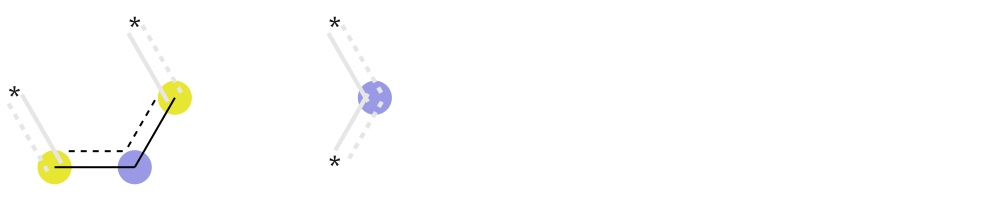

In [18]:
from rdkit.Chem import Descriptors, AllChem, MolFromSmiles, MolToSmiles
from rdkit.Chem.Draw import DrawMorganBits

from IPython.display import SVG, display, HTML

mol = MolFromSmiles(paracetamol_smiles)

if mol:
    bi = {}
    fp = AllChem.GetMorganFingerprint(mol, 1, bitInfo=bi)
    on_bits = fp.GetNonzeroElements().keys()
    
    print(on_bits)
    if len(on_bits) > 0:
        img_features = DrawMorganBits([(mol, bit, bi) for bit in on_bits], useSVG=False, molsPerRow=5, 
                                  subImgSize=(200,200))

        display(img_features)
    
# with open(join(output_img_path, "ECFP4.png"), "wb") as f:
#     img_features.save(f)

{'c(c)c'}


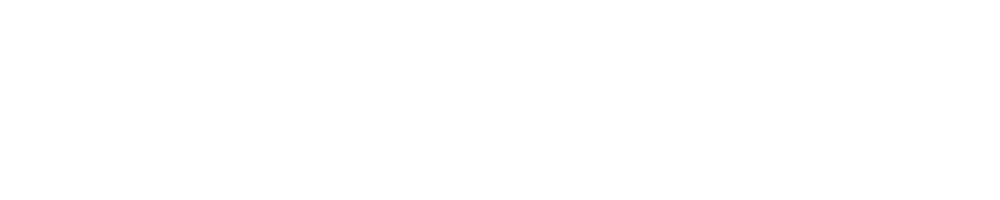

In [21]:
from evomol.evaluation_entropy import extract_shingles
from rdkit.Chem.Draw import MolsToGridImage
from PIL import Image
import io

shg_list = extract_shingles(smiles=paracetamol_smiles, level=1)
print(shg_list)
mol_list = [MolFromSmiles(smi) for smi in shg_list]
img = MolsToGridImage(mol_list, subImgSize=(200, 200), molsPerRow=5, 
                      highlightAtomLists=[[0], [0], [0], [0], [0]])


buf = io.BytesIO()
buf.write(img.data)
buf.seek(0)
img = Image.open(buf)

img
# with open(join(output_img_path, "shingles.png"), "wb") as f:
#     img.save(f)

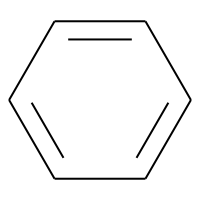

In [22]:
from rdkit.Chem.Draw import MolToImage

img = MolToImage(MolFromSmiles(paracetamol_smiles), size=(200, 200))
img
# with open(join(output_img_path, "mol.png"), "wb") as f:
#     img.save(f)